In [204]:
import json
import os

# Define the file path
file_path = "/Users/garn195/Project Repositories/PauliTrans/Benchmarking_Stats/circuit_stats.json"

# Define the keys you want to import
keys = ["proc time", "opt time", "num_qubits", "raw T gates", "optimized T gates", "optimize iteration", 
        "optimize T ratio", "raw layer", "optimized layers", "optimized layer ratio", 
        "raw weights", "optimized weights"]

# Dictionary to store the filtered data
python_data = {}

# Load the JSON data from the file
if os.path.exists(file_path):
    with open(file_path, "r") as file:
        full_data = json.load(file)

    # Filter the data based on the keys
    for filename, stats in full_data.items():
        filtered_stats = {key: stats[key] for key in keys if key in stats}
        python_data[filename+".txt"] = filtered_stats

    print("Filtered data successfully loaded.")
else:
    print(f"File {file_path} not found!")

print(python_data)


Filtered data successfully loaded.
{'qft_n18_iter2.txt': {'proc time': 1.1859357640005328, 'opt time': 300.28282134800065, 'num_qubits': 18, 'raw T gates': 14383, 'optimized T gates': 11463, 'optimize iteration': 2, 'optimize T ratio': 0.20301745115761663, 'raw layer': 4311, 'optimized layers': 4311, 'optimized layer ratio': 0.0, 'raw weights': 2.975735242995203, 'optimized weights': 5.611881706359592}, 'adder_n10.txt': {'proc time': 0.0029078299994580448, 'opt time': 0.02109068599929742, 'num_qubits': 10, 'raw T gates': 88, 'optimized T gates': 32, 'optimize iteration': 3, 'optimize T ratio': 0.6363636363636364, 'raw layer': 10, 'optimized layers': 7, 'optimized layer ratio': 0.30000000000000004, 'raw weights': 3.272727272727273, 'optimized weights': 6.5}, 'adder_n4.txt': {'proc time': 0.0005817310011480004, 'opt time': 0.0004425089991855202, 'num_qubits': 4, 'raw T gates': 4, 'optimized T gates': 4, 'optimize iteration': 1, 'optimize T ratio': 0.0, 'raw layer': 1, 'optimized layers':

In [205]:
folder_path = "/Users/garn195/Project Repositories/NWQ-Sim/stabilizer/stab_T_bench"  # Folder containing text files
keys = ["proc time", "opt time", "raw T gates", "optimized T gates", "optimize iteration", "total gates"]
stab_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r") as file:
            lines = [line.strip() for line in file]

        if len(lines) != len(keys):
            raise ValueError(f"File {filename} does not match expected number of lines!")

        stab_data[filename] = dict(zip(keys, lines))

print(stab_data)

{'adder_n4.txt': {'proc time': '5e-05', 'opt time': '1.7e-05', 'raw T gates': '4', 'optimized T gates': '4', 'optimize iteration': '1', 'total gates': '25'}, 'adder_n10.txt': {'proc time': '0.00058', 'opt time': '0.00088', 'raw T gates': '88', 'optimized T gates': '48', 'optimize iteration': '2', 'total gates': '189'}, 'qft_n18_iter2.txt': {'proc time': '1.8791', 'opt time': '9.60316', 'raw T gates': '14383', 'optimized T gates': '11463', 'optimize iteration': '2', 'total gates': '27292'}, 'qft_n18_iter1.txt': {'proc time': '0.034606', 'opt time': '0.185734', 'raw T gates': '1677', 'optimized T gates': '1333', 'optimize iteration': '2', 'total gates': '3290'}}


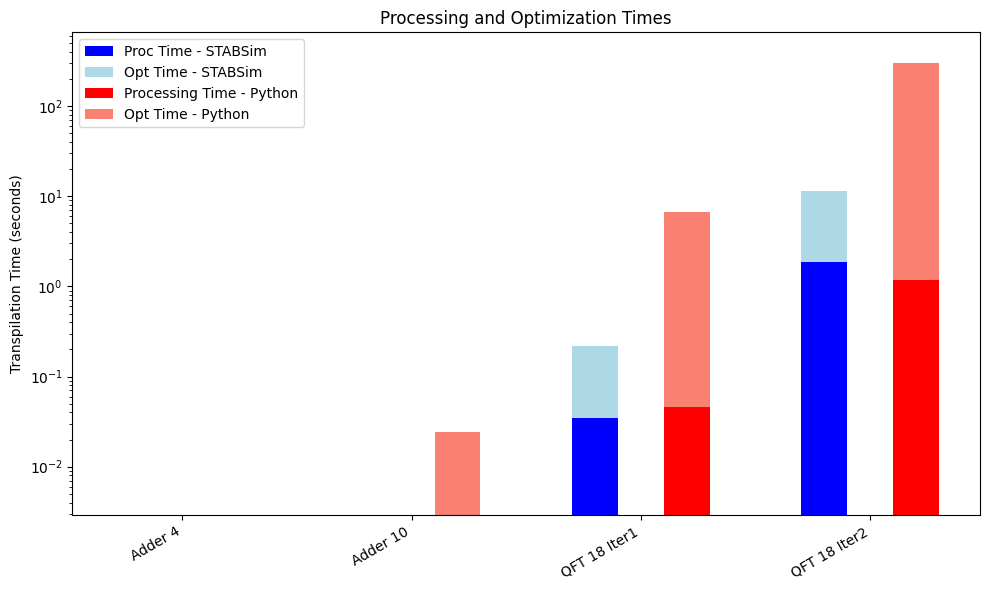

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Custom labels and matching keys
keys = ['qft_n18_iter2.txt', 'adder_n10.txt', 'adder_n4.txt', 'qft_n18_iter1.txt']
labels = ['Adder 4', 'Adder 10', 'QFT 18 Iter1', 'QFT 18 Iter2' ]

# Extract and compute total times
times = [(key, label, 
          float(stab_data[key]['proc time']), 
          float(stab_data[key]['opt time']),
          float(python_data[key]['proc time']), 
          float(python_data[key]['opt time']), 
          ) 
         for key, label in zip(keys, labels)]

# Sort by total (proc + opt) time (Python)
times.sort(key=lambda x: x[2] + x[3])  

# Unpack sorted data
sorted_keys, sorted_labels, proc_times1, opt_times1, proc_times2, opt_times2 = zip(*times)

x = np.arange(len(sorted_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, proc_times1, width, label='Proc Time - STABSim', color='blue')
ax.bar(x - width, opt_times1, width, bottom=proc_times1, label='Opt Time - STABSim', color='lightblue')
ax.bar(x + width, proc_times2, width, label='Processing Time - Python', color='red')
ax.bar(x + width, opt_times2, width, bottom=proc_times2, label='Opt Time - Python', color='salmon')

ax.set_ylabel('Transpilation Time (seconds)')
ax.set_title('Processing and Optimization Times')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

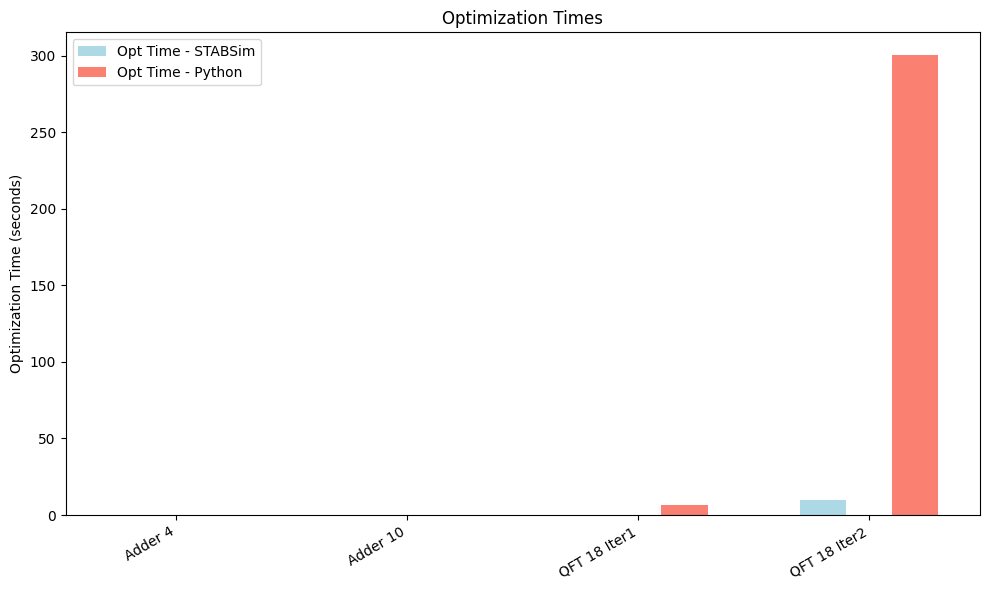

In [207]:
labels = ['Adder 4', 'Adder 10', 'QFT 18 Iter1', 'QFT 18 Iter2' ]
#  Plot only optimization times
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, opt_times1, width, label='Opt Time - STABSim', color='lightblue')
ax.bar(x + width, opt_times2, width, label='Opt Time - Python', color='salmon')

ax.set_ylabel('Optimization Time (seconds)')
ax.set_title('Optimization Times')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

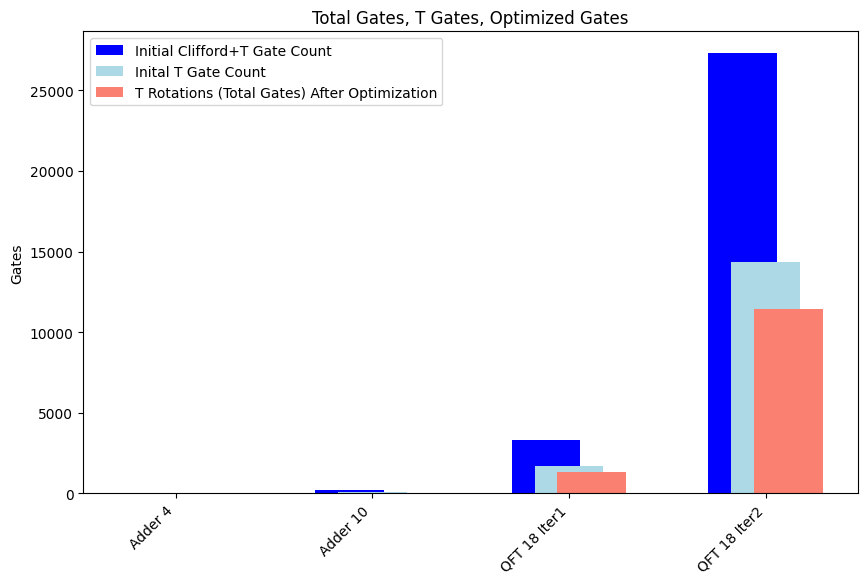

In [208]:
import matplotlib.pyplot as plt
import numpy as np

keys = ['qft_n18_iter2.txt', 'adder_n10.txt', 'adder_n4.txt', 'qft_n18_iter1.txt']
labels = ['Adder 4', 'Adder 10', 'QFT 18 Iter1', 'QFT 18 Iter2']

total_gates = [float(item['total gates']) for item in stab_data.values()]
raw_t_gates = [float(item['raw T gates']) for item in python_data.values()]
optimized_t_gates = [float(item['optimized T gates']) for item in python_data.values()]


sorted_indices = np.argsort(total_gates)

sorted_total_gates = np.array(total_gates)[sorted_indices]
sorted_raw_t_gates = np.array(raw_t_gates)[np.argsort(raw_t_gates)]
sorted_optimized_t_gates = np.array(optimized_t_gates)[np.argsort(optimized_t_gates)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars0 = ax.bar(x - width/3, sorted_total_gates, width, label='Initial Clifford+T Gate Count', color="blue")
bars1 = ax.bar(x, sorted_raw_t_gates, width, label='Inital T Gate Count', color="lightblue")
bars2 = ax.bar(x + width/3, sorted_optimized_t_gates, width, label='T Rotations (Total Gates) After Optimization', color="salmon")

ax.set_ylabel('Gates')
ax.set_title('Total Gates, T Gates, Optimized Gates')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") 
ax.legend()
